In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_path = 'EEG-AI-Layer/data/4 Stim Dataset June (11.75, 12.75, 10.25, 14.75)/Avery (Dist=500px, Diameter=0.8, Acer Monitor)/173_2022_515272.csv'

In [5]:
df = pd.read_csv(data_path)
df

,time,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,Color Code,Frequency
0,2022-06-22 18:59:37.936403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,2022-06-22 18:59:37.945950,17353.313250,-1318.372943,1361.668272,1220.159378,-9085.246514,-24154.814977,-12353.406829,-6938.383810,NaN,NaN
2,2022-06-22 18:59:37.953394,17355.168445,-1321.926871,1356.594426,1212.492730,-9142.243462,-24167.287250,-12362.593396,-6945.424610,NaN,NaN
3,2022-06-22 18:59:37.953397,17361.583395,-1313.142635,1358.963711,1218.013611,-9102.703226,-24156.111378,-12354.569120,-6934.606366,NaN,NaN
4,2022-06-22 18:59:37.960028,17383.868084,-1291.953181,1372.598275,1234.620957,-9034.306888,-24136.486547,-12335.726599,-6908.410121,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
61738,2022-06-22 19:03:44.493599,16584.480296,-2009.175957,1112.491025,709.600831,-9624.571755,-24316.887476,-12027.719561,-7022.851053,NaN,NaN
61739,2022-06-22 19:03:44.501661,16591.118764,-1992.769777,1120.358839,720.977869,-9550.006336,-24295.027470,-12017.303648,-7005.617858,NaN,NaN
61740,2022-06-22 19:03:44.501675,16594.918560,-1988.053559,1125.611499,723.525968,-9541.423266,-24290.579473,-12011.715712,-7000.365198,NaN,NaN
61741,2022-06-22 19:03:44.509766,16589.375328,-2002.202213,1118.838920,712.126578,-9615.452244,-24309.734918,-12020.924630,-7016.480805,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61743 entries, 0 to 61742
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        61743 non-null  object 
 1   CH1         61743 non-null  float64
 2   CH2         61743 non-null  float64
 3   CH3         61743 non-null  float64
 4   CH4         61743 non-null  float64
 5   CH5         61743 non-null  float64
 6   CH6         61743 non-null  float64
 7   CH7         61743 non-null  float64
 8   CH8         61743 non-null  float64
 9   Color Code  46 non-null     float64
 10  Frequency   46 non-null     float64
dtypes: float64(10), object(1)
memory usage: 5.2+ MB


In [7]:
df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,Color Code,Frequency
count,61743.000000,61743.000000,61743.000000,61743.000000,61743.000000,61743.000000,61743.000000,61743.000000,46.000000,46.000000
mean,17053.771468,-1590.087000,1381.200690,1059.659152,-9260.369621,-24166.435700,-12154.791829,-6966.679599,0.434783,5.380435
std,228.919195,194.111823,153.070655,175.714755,169.089807,154.735910,202.586743,139.528882,0.501206,6.297429
min,0.000000,-2049.722022,0.000000,0.000000,-9743.527739,-24412.664701,-12561.926253,-7264.115782,0.000000,0.000000
25%,16886.541770,-1719.787922,1290.310328,931.084267,-9364.799781,-24276.252005,-12321.320900,-7072.986015,0.000000,0.000000
50%,17042.869871,-1598.395598,1365.870400,1064.770051,-9262.495847,-24180.988870,-12156.689126,-6982.617913,0.000000,0.000000
75%,17225.718317,-1447.264278,1496.438115,1176.573476,-9147.607881,-24062.759317,-11998.002916,-6845.434081,1.000000,11.750000
max,17494.062185,0.000000,1783.535097,1449.376517,0.000000,0.000000,0.000000,0.000000,1.000000,14.750000


In [8]:
df.shape

(61743, 11)

In [9]:
# 13 different frequencies
# [0.0, 9.25, 10.25, 10.75, 9.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75]

# current 4 different frequencies
# [10.25, 11.75, 12.75, 14.75]
vals = []
count = 0
for i in range(df.shape[0]):
    freq = df.iloc[i]['Frequency']
    if freq >= 0:
        count += 1
        print(i, freq)
        vals.append(freq)
print(count)
print(np.unique(vals))

0 0.0
5254 0.0
6510 14.75
7763 0.0
9021 11.75
10275 0.0
11532 12.75
12785 0.0
14043 10.25
15297 0.0
16553 0.0
17812 14.75
19065 0.0
20322 12.75
21575 0.0
22830 10.25
24083 0.0
25340 11.75
26593 0.0
27850 0.0
29109 10.25
30360 0.0
31619 11.75
32872 0.0
34129 12.75
35382 0.0
36639 14.75
37890 0.0
39149 0.0
40404 12.75
41657 0.0
42914 14.75
44167 0.0
45422 10.25
46675 0.0
47932 11.75
49185 0.0
50444 0.0
51699 10.25
52954 0.0
54211 11.75
55466 0.0
56721 12.75
57974 0.0
59233 14.75
60484 0.0
46
[ 0.   10.25 11.75 12.75 14.75]


In [10]:
# 0 0.0
# 5254 0.0
# 6510 14.75
# 7763 0.0
# 9021 11.75
# 10275 0.0
# 11532 12.75
# 12785 0.0
# 14043 10.25
# 15297 0.0

lower = 9021
upper = 15297 + 1
X = range(lower,upper)
first_activity = df[lower:upper]
first_activity

,time,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,Color Code,Frequency
9021,2022-06-22 19:00:13.970601,17262.431057,-1364.797516,1476.198611,1243.025213,-9034.150426,-24085.412810,-12262.524636,-6946.832770,1.0,11.75
9022,2022-06-22 19:00:13.970620,17256.217272,-1377.269790,1470.320102,1232.631651,-9081.133793,-24099.941444,-12270.258340,-6964.445944,NaN,NaN
9023,2022-06-22 19:00:13.978709,17247.388333,-1394.011246,1461.558218,1222.528663,-9142.735200,-24116.213514,-12282.372985,-6981.232104,NaN,NaN
9024,2022-06-22 19:00:13.978725,17255.703182,-1380.711958,1470.320102,1234.352736,-9097.651732,-24098.712098,-12272.091183,-6968.312796,NaN,NaN
9025,2022-06-22 19:00:13.984873,17263.727458,-1365.624531,1479.640779,1246.892064,-9028.048399,-24081.255386,-12262.859912,-6948.464447,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15293,2022-06-22 19:00:39.014917,17378.302500,-1350.224179,1582.816432,1344.412725,-9006.233097,-23997.883379,-12142.875748,-6877.207086,NaN,NaN
15294,2022-06-22 19:00:39.014932,17371.261701,-1366.339787,1575.038025,1334.041516,-9080.195019,-24016.770603,-12151.481170,-6893.814432,NaN,NaN
15295,2022-06-22 19:00:39.021491,17370.971128,-1360.505982,1577.094385,1336.120228,-9076.059947,-24010.512115,-12153.291661,-6893.032121,NaN,NaN
15296,2022-06-22 19:00:39.021507,17381.141172,-1343.496304,1579.418967,1343.026917,-9007.507146,-23999.224484,-12141.646402,-6872.602626,NaN,NaN


done


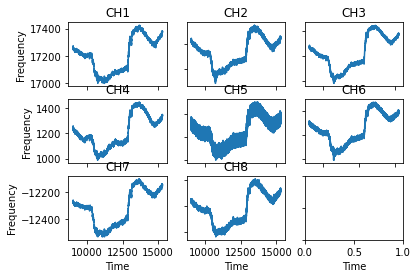

In [11]:
# X = first_activity['time']

fig, axs = plt.subplots(3,3)
axs[0][0].plot(X, first_activity['CH1'])
axs[0][0].set_title('CH1')

axs[0][1].plot(X, first_activity['CH2'])
axs[0][1].set_title('CH2')

axs[0][2].plot(X, first_activity['CH3'])
axs[0][2].set_title('CH3')

axs[1][0].plot(X, first_activity['CH4'])
axs[1][0].set_title('CH4')

axs[1][1].plot(X, first_activity['CH5'])
axs[1][1].set_title('CH5')

axs[1][2].plot(X, first_activity['CH6'])
axs[1][2].set_title('CH6')

axs[2][0].plot(X, first_activity['CH7'])
axs[2][0].set_title('CH7')

axs[2][1].plot(X, first_activity['CH8'])
axs[2][1].set_title('CH8')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Frequency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

print('done')

In [12]:
# make every single value labelled
del_rows = []
del_count = 1

curr_freq = 0

data = df

for i in range(len(data)):
    # print(i)
    # print(data.iloc[i])
    freq = data.iloc[i]['Frequency']
    if freq != curr_freq and freq >= 0:
        curr_freq = freq
        # del_count = 38
    if del_count > 0:
        del_count -= 1
        del_rows.append(i)
    data.at[i, 'Frequency'] = curr_freq

In [13]:
data.shape

(61743, 11)

In [14]:
data = data.drop(del_rows)
data.shape

(61742, 11)

In [15]:
data.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,Color Code,Frequency
count,61742.000000,61742.000000,61742.000000,61742.000000,61742.000000,61742.000000,61742.000000,61742.000000,45.000000,61742.000000
mean,17054.047678,-1590.112753,1381.223061,1059.676314,-9260.519606,-24166.827110,-12154.988693,-6966.792434,0.444444,5.022578
std,218.390174,194.007882,152.970931,175.664419,164.932911,120.350732,196.593824,136.683982,0.502519,6.165243
min,16563.983746,-2049.722022,1023.396972,663.712700,-9743.527739,-24412.664701,-12561.926253,-7264.115782,0.000000,0.000000
25%,16886.547358,-1719.787922,1290.321504,931.084267,-9364.799781,-24276.252005,-12321.326488,-7072.986015,0.000000,0.000000
50%,17042.881047,-1598.395598,1365.870400,1064.781226,-9262.495847,-24180.988870,-12156.689126,-6982.617913,0.000000,0.000000
75%,17225.723904,-1447.275453,1496.443703,1176.573476,-9147.613468,-24062.770493,-11998.019680,-6845.445257,1.000000,11.750000
max,17494.062185,-1166.515191,1783.535097,1449.376517,-8840.606670,-23878.033325,-11768.282863,-6696.582639,1.000000,14.750000


done


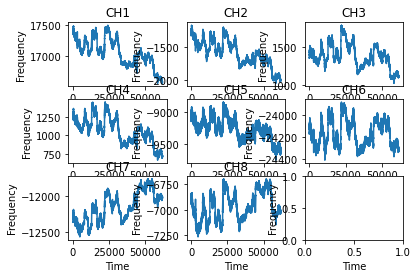

In [16]:
# X = first_activity['time']
X = range(len(data))

fig, axs = plt.subplots(3,3)
axs[0][0].plot(X, data['CH1'])
axs[0][0].set_title('CH1')

axs[0][1].plot(X, data['CH2'])
axs[0][1].set_title('CH2')

axs[0][2].plot(X, data['CH3'])
axs[0][2].set_title('CH3')

axs[1][0].plot(X, data['CH4'])
axs[1][0].set_title('CH4')

axs[1][1].plot(X, data['CH5'])
axs[1][1].set_title('CH5')

axs[1][2].plot(X, data['CH6'])
axs[1][2].set_title('CH6')

axs[2][0].plot(X, data['CH7'])
axs[2][0].set_title('CH7')

axs[2][1].plot(X, data['CH8'])
axs[2][1].set_title('CH8')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Frequency')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

print('done')

In [17]:
data

,time,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,Color Code,Frequency
1,2022-06-22 18:59:37.945950,17353.313250,-1318.372943,1361.668272,1220.159378,-9085.246514,-24154.814977,-12353.406829,-6938.383810,NaN,0.0
2,2022-06-22 18:59:37.953394,17355.168445,-1321.926871,1356.594426,1212.492730,-9142.243462,-24167.287250,-12362.593396,-6945.424610,NaN,0.0
3,2022-06-22 18:59:37.953397,17361.583395,-1313.142635,1358.963711,1218.013611,-9102.703226,-24156.111378,-12354.569120,-6934.606366,NaN,0.0
4,2022-06-22 18:59:37.960028,17383.868084,-1291.953181,1372.598275,1234.620957,-9034.306888,-24136.486547,-12335.726599,-6908.410121,NaN,0.0
5,2022-06-22 18:59:37.960030,17363.170369,-1305.252469,1369.178458,1229.301242,-9065.889903,-24140.778082,-12340.375762,-6905.772615,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
61738,2022-06-22 19:03:44.493599,16584.480296,-2009.175957,1112.491025,709.600831,-9624.571755,-24316.887476,-12027.719561,-7022.851053,NaN,0.0
61739,2022-06-22 19:03:44.501661,16591.118764,-1992.769777,1120.358839,720.977869,-9550.006336,-24295.027470,-12017.303648,-7005.617858,NaN,0.0
61740,2022-06-22 19:03:44.501675,16594.918560,-1988.053559,1125.611499,723.525968,-9541.423266,-24290.579473,-12011.715712,-7000.365198,NaN,0.0
61741,2022-06-22 19:03:44.509766,16589.375328,-2002.202213,1118.838920,712.126578,-9615.452244,-24309.734918,-12020.924630,-7016.480805,NaN,0.0


In [18]:
from tensorflow.keras.utils import to_categorical

X = data[['CH1','CH2','CH3','CH4','CH5','CH6','CH7','CH8']]
y = np.array(data['Frequency'])
# y = to_categorical(y, num_classes=5)
# y

y_cat = []
uni = np.unique(y)
for i in y:
    if i == uni[0]:
        y_cat.append([1,0,0,0,0])
    elif i == uni[1]:
        y_cat.append([1,0,0,0,0])
    elif i == uni[2]:
        y_cat.append([0,0,1,0,0])
    elif i == uni[3]:
        y_cat.append([0,0,0,1,0])
    elif i == uni[4]:
        y_cat.append([0,0,0,0,1])
    else:
        print('error')
y_cat = np.array(y_cat)
y_cat

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_cat,
    test_size=0.25,
    random_state=42
)
print('split')

split


In [20]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model


def neural_network():
    inp = Input(shape=(8,))
    x = Dense(64, activation='relu')(inp)
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    out = Dense(5, activation='softmax')(x)

    model = Model(inp, out)
    return model


In [21]:
from tensorflow.keras import optimizers, losses


model = neural_network()
adam = optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(
    optimizer=adam, 
    loss=losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [22]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=16,
    epochs=10,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True
)

Epoch 1/10
2140/2895 [=====================>........] - ETA: 6s - loss: 13.9173 - accuracy: 0.5437

KeyboardInterrupt: 

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=0)
clf

RandomForestClassifier(max_depth=4, random_state=0)

In [24]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [29]:
clf.predict(X_test)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [30]:
clf.score(X_test, y_test)

0.6843094065820161